## Bank Churn Prediction

## Given a Bank customer, can we build a classifier that can determine whether they will leave or not using
## Neural networks?

Dataset
Bank Turnover Dataset
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
    
Steps
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into training and test sets ( 2.5 points)
5. Normalize the train and test data (5 points)
6. Initialize & build the model. [ Make sure that you add 2 to 5 hidden dense layers in this model ] (10
points)
7. Predict the results (5 points)
8. Print the Accuracy score and confusion matrix (2.5 poi

In [1255]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## 1. Read the dataset

In [1256]:
# Loading the .csv
churn = pd.read_csv("/content/Churn_Modelling.csv")  
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [1257]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1258]:
churn.shape

(10000, 14)

In [1259]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [1260]:
# checking for any missing values
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 2. Drop the columns which are unique for all users like IDs (2.5 points)

In [1261]:

# Droping unnecesary attributes
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)  # inplace=True to perform it over the dataset itself


In [1262]:
# lable encoding Gender attribute
churn['Gender'] = churn['Gender'].map({'Male': 0,'Female': 1})

In [1263]:

# Separating numerical and categorical variables (one-hot encoding)
num_subset = churn.select_dtypes('number')
cat_subset = churn.select_dtypes('object')

# Obtain one-hote enconded features using pd.get_dummies
cat_subset = pd.get_dummies(cat_subset)

In [1264]:
churn = pd.concat([cat_subset, num_subset], axis=1)       # Concatenate both subsets


In [1265]:
print(churn.dtypes)  

# Displaying a dataset head
display(churn.head())

Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
dtype: object


,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,619,1,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,502,1,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,699,1,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,1,43,2,125510.82,1,1,1,79084.10,0


## 3. Distinguish the feature and target set (2.5 points)

In [1266]:
# all the columns except EXITED
X=churn.iloc[:,0:12]

#only EXITED column
Y= np.ravel(churn.Exited)


## 4. Divide the data set into training and test sets ( 2.5 points)

In [1267]:
X_Train, X_Test, Y_Train, Y_Test= train_test_split(X, Y, test_size=0.2)


In [1268]:
X_Train.shape

(8000, 12)

In [1269]:
Y_Train.shape

(8000,)

In [1270]:
Y_Test.shape

(2000,)

## 5. Normalize the train and test data (5 points)

In [1271]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_Train=sc_X.fit_transform(X_Train)
X_Test=sc_X.fit_transform(X_Test)

## 6. Initialize & build the model. [ Make sure that you add 2 to 5 hidden dense layers in this model ] (10
## points)

In [1272]:
model= Sequential()


In [1273]:
model.add(Dense(12,activation = 'relu', ))
model.add(Dense(5, activation ='relu'))
model.add(Dense(5, activation ='relu'))
model.add(Dense(5, activation ='relu'))
model.add(Dense(1,activation='sigmoid'))

In [1274]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1275]:
history = model.fit(X_Train, Y_Train, epochs=100, batch_size=200, validation_split=0.1,verbose=1)

Epoch 1/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.6692 - val_loss: 0.6653 - val_accuracy: 0.8138
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.7944 - val_loss: 0.6213 - val_accuracy: 0.8150
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7946 - val_loss: 0.5612 - val_accuracy: 0.8150
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7946 - val_loss: 0.5028 - val_accuracy: 0.8150
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5071 - accuracy: 0.7946 - val_loss: 0.4639 - val_accuracy: 0.8150
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7946 - val_loss: 0.4406 - val_accuracy: 0.8150
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.7946 - val_loss: 0.4310 - val_accuracy: 0.8150
Epoch 8/100
3

In [1276]:
loss, acc = model.evaluate(X_Test, Y_Test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.857
Loss: 0.346


## 7. Predict the results (5 points)

In [1277]:
y_pred = model.predict(X_Test)

In [1278]:
#converting y_pred to binary so its compatible with Y_Test and hence can be used for accuracy and matrix calculation
y_pred = (y_pred > 0.5).astype(int)


In [1279]:
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [1280]:
print(Y_Test)

[0 0 0 ... 0 0 0]


In [1281]:
#Lets take an example for prediction, we shall pick some random rows and see what the model predicts 
# and since we already know the prediction for the row from the "EXITED" column we can compare
# it with prediction made by our model

display(churn.head(5))

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,619,1,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,502,1,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,699,1,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,1,43,2,125510.82,1,1,1,79084.10,0


In [1282]:
# this is the second row from the dataset displayed above and EXITED =0 for this
print(model.predict(sc_X.transform([[0,0,1,608,1,41,1,83807.86,1,0,1,112542.58]])))

#from the output of the model which is less than 0.5 , prediction is correct i.e. customer stays

[[0.24378896]]


In [1283]:
# this is the 3rd row from the dataset , EXITED =1
print(model.predict(sc_X.transform([[1,0,0,502,1,42,8,159660.80,3,1,0,113931.57,]])))

# Customer exits as value is >0.5 which is inline with EXITED value in the data set

[[0.9980097]]


In [1284]:
#plotting Accuracy of the model over epocs

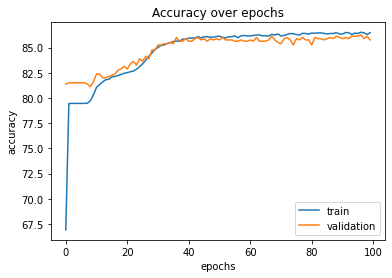

In [1285]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

## 8. Print the Accuracy score and confusion matrix (2.5 points)

In [1286]:
cm= confusion_matrix(Y_Test,y_pred)
print(cm)

accuracy_score(Y_Test, y_pred)



[[1531   59]
 [ 228  182]]


0.8565

In [1287]:
#  Accuracy = 85.65%

# Total correct predictions that customers stay in bank = 1531

# Total correct predictions that customers leave the bank = 182

# Total incorrect predictions that customers stay in the bank = 228

# Total incorrect predictions that customers leave in the bank = 59

In [1288]:
from sklearn import metrics

cr=metrics.classification_report(Y_Test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1590
           1       0.76      0.44      0.56       410

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

